In [14]:
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
import numpy as np

%run ../JM_custom_figs.py
%run ../fx4roc.py
%run ../figs4roc.py

In [5]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"
outputfolder = "C:\\Github\\Distraction-Paper\\output\\"

try:
    pickle_in = open(datafolder + "distraction_data_only_snips.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [7]:
def resample_snips(snips, factor=0.1):
    if len(snips)>0:
        n_bins = len(snips[0])
        out_bins = int(n_bins * factor)

        snips_out = []
        for snip in snips:
            snips_out.append(np.mean(np.reshape(snip, (out_bins, -1)), axis=1))
    
        return snips_out
    else:
        return []

In [8]:
mod_dis_photo_snips, mod_notdis_photo_snips, = [], []
dis_dis_photo_snips, dis_notdis_photo_snips, = [], []

rats=disDict.keys()

for rat in rats:
    d = disDict[rat]
    
    snips_dis = resample_snips(d['snips_distracted']['filt_z'])
    dis_dis_photo_snips.append(snips_dis)
    
    snips_notdis = resample_snips(d['snips_not-distracted']['filt_z'])
    dis_notdis_photo_snips.append(snips_notdis)
    
    d = modDict[rat]
    
    snips_dis = resample_snips(d['snips_distracted']['filt_z'])
    mod_dis_photo_snips.append(snips_dis)
    
    snips_notdis = resample_snips(d['snips_not-distracted']['filt_z'])
    mod_notdis_photo_snips.append(snips_notdis)

mod_dis_photo_snips_flat = flatten_list(mod_dis_photo_snips)
mod_notdis_photo_snips_flat = flatten_list(mod_notdis_photo_snips)

dis_dis_photo_snips_flat = flatten_list(dis_dis_photo_snips)
dis_notdis_photo_snips_flat = flatten_list(dis_notdis_photo_snips)

In [16]:
%run ../fx4roc.py
import time
start_time = time.time()

a, p = nanroc(mod_dis_photo_snips_flat, dis_dis_photo_snips_flat, n4shuf=2000)

print(f"--- Total ROC analysis took {(time.time() - start_time)} seconds ---")

savefile=True
if savefile:
    pickle_out = open(outputfolder+"roc_results_photo_mod-disVdis-dis", 'wb')
    dill.dump([a, p], pickle_out)
    pickle_out.close()

In [24]:
%run ../fx4roc.py
import time
start_time = time.time()

a, p = nanroc(mod_notdis_photo_snips_flat, dis_notdis_photo_snips_flat, n4shuf=2000)

print(f"--- Total ROC analysis took {(time.time() - start_time)} seconds ---")

savefile=True
if savefile:
    pickle_out = open(outputfolder+"roc_results_photo_mod-notdisVdis-notdis", 'wb')
    dill.dump([a, p], pickle_out)
    pickle_out.close()

Analysing column 0
Analysing column 1
Analysing column 2
Analysing column 3
Analysing column 4
Analysing column 5
Analysing column 6
Analysing column 7
Analysing column 8
Analysing column 9
Analysing column 10
Analysing column 11
Analysing column 12
Analysing column 13
Analysing column 14
Analysing column 15
Analysing column 16
Analysing column 17
Analysing column 18
Analysing column 19
--- Total ROC analysis took 327.40357780456543 seconds ---


In [27]:
p

[0.2455,
 0.48,
 0.125,
 0.588,
 0.627,
 0.0655,
 0.0,
 0.028,
 0.5925,
 0.3355,
 0.0625,
 0.0505,
 0.024,
 0.022,
 0.0795,
 0.014,
 0.010499999999999999,
 0.0055,
 0.0,
 0.005]

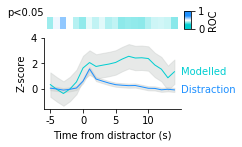

In [32]:
try:
    pickle_in = open(outputfolder+"roc_results_photo_mod-disVdis-dis", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')
        
[a, p] = dill.load(pickle_in)

f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, mod_dis_photo_snips_flat, dis_dis_photo_snips_flat,
                 cdict = [(0, 'darkturquoise'), (0.25, 'darkturquoise'), (0.5, 'white'), (0.75, 'dodgerblue'), (1, 'dodgerblue')],
                 colors = ['darkturquoise', 'dodgerblue'],
                 labels=['Modelled', 'Distraction'],
                 labeloffset=0,
                 ylabel='Z-score')

ax[1].set_yticks([0, 2, 4])

f.savefig(figfolder+"fig4_mod-v-dis_distracted trials_photo.pdf")

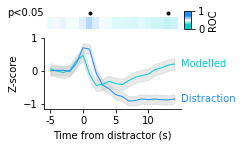

In [31]:
try:
    pickle_in = open(outputfolder+"roc_results_photo_mod-notdisVdis-notdis", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')
        
[a, p] = dill.load(pickle_in)
        
f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, mod_notdis_photo_snips_flat, dis_notdis_photo_snips_flat,
                 cdict = [(0, 'darkturquoise'), (0.25, 'darkturquoise'), (0.5, 'white'), (0.75, 'dodgerblue'), (1, 'dodgerblue')],
                 colors = ['darkturquoise', 'dodgerblue'],
                 labels=['Modelled', 'Distraction'],
                 labeloffset=0,
                 ylabel='Z-score')

ax[1].set_yticks([-1, 0, 1])

f.savefig(figfolder+"fig4_mod-v-dis_notdistracted trials_photo.pdf")

In [21]:
p

[0.07400000000000001,
 0.7725,
 0.025500000000000002,
 0.952,
 0.178,
 0.0575,
 0.643,
 0.2615,
 0.5985,
 0.158,
 0.271,
 0.047,
 0.05550000000000001,
 0.058499999999999996,
 0.052000000000000005,
 0.175,
 0.353,
 0.4195,
 0.347,
 0.033]